In [1]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

from pipelines import pipeline_Freeman
from transform import combine_tsv_files, generate_data_pairs, generate_model_data_pairs
from views import compare_prognostic_value_genomic_information, view_linear_model_freeman

In [2]:
# Difference genomic variable.
X_train_dt, y_train = combine_tsv_files(
    "output/train__pathway__difference__No. Mutant Molecules per mL.tsv",
    "output/train__pathway__difference__CNV Score.tsv",
)

In [3]:
y_train = y_train["response_grouped"]

response_labels = ['non responder (sd+pd)', 'responder (pr+cr)', 'non evaluable (ne)']
pos_label = 'responder (pr+cr)'
y_train = y_train == pos_label

In [4]:
# Parameters for logistic regression.
logistic_Freeman_parameters = {'estimator__C': 0.1, 'estimator__class_weight': 'balanced'}
logistic_parameters = {'C': 0.1, 'class_weight': 'balanced'}

In [5]:
logistic_Freeman = pipeline_Freeman(LogisticRegression)
logistic_Freeman.set_params(**logistic_Freeman_parameters)

Pipeline(memory=None,
         steps=[('clinical_curation',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function clinical_data_curation at 0x7f6c137ceee0>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('filter_clinical_variables',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function drop_specific_phenoty...
                                                   'lymfmeta', 'brainmeta',
                                                   'adrenalmeta', 'livermeta',
                                                   'lungmeta', 'skeletonmeta',
                                                   'age'])],
                                   verbose=False)),
                ('estimator',
                 LogisticRegression(C=0.1, cla

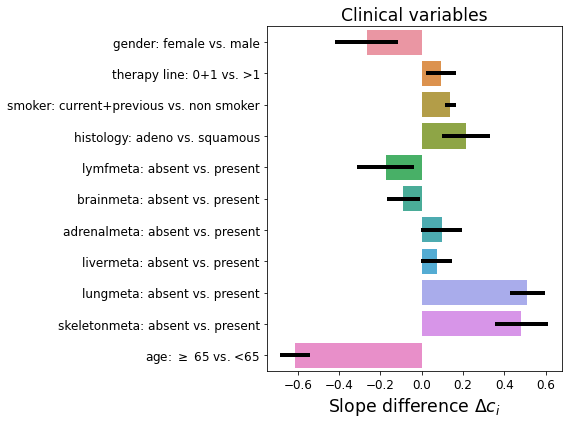

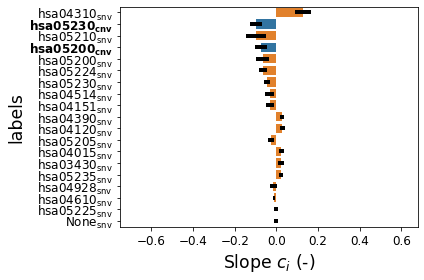

In [6]:
figure_filenames = (
    "logistic_regression__pathway__clinical_freeman__difference", 
    "logistic_regression__pathway__genetic_freeman__difference",
)
view_linear_model_freeman(
    X_train_dt, 
    y_train, 
    logistic_Freeman, 
    filenames=figure_filenames, 
    top_n=None,  # Show all.
)